In [1]:

import os
print(os.getcwd())



C:\Users\Ayza Hania\bharat intern\SMS classifier


In [2]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'Untitled.ipynb']


In [2]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'spam.csv', 'Untitled.ipynb', 'untitled.txt']


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Select only the relevant columns
data = data[['v1', 'v2']]

# Rename the columns for better understanding
data.columns = ['label', 'text']

# Display the first few rows of the dataset
print(data.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
# Check for missing values
print(data.isnull().sum())


label    0
text     0
dtype: int64


In [5]:
import re

# Function to clean the text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    return text

# Apply the clean_text function to the 'text' column
data['text'] = data['text'].apply(clean_text)

# Display the first few rows of the cleaned dataset
print(data.head())


  label                                               text
0   ham  go until jurong point crazy available only in ...
1   ham                           ok lar joking wif u oni 
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham       u dun say so early hor u c already then say 
4   ham  nah i don t think he goes to usf he lives arou...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(data['text'])

# Display the shape of the resulting feature matrix
print(X.shape)


(5572, 8672)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the label data
y = label_encoder.fit_transform(data['label'])

# Display the unique labels
print(label_encoder.classes_)


['ham' 'spam']


In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape)


(4457, 8672) (1115, 8672)


In [9]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the MultinomialNB classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [11]:
# Function to predict if a message is spam or ham
def predict_message(message):
    message = clean_text(message)
    message_features = vectorizer.transform([message])
    prediction = model.predict(message_features)
    return 'spam' if prediction[0] == 1 else 'ham'

# Test the function with a new message
print(predict_message("Congratulations! You've won a free ticket to the Bahamas!"))
print(predict_message("Hey, are we still on for lunch tomorrow?"))


spam
ham


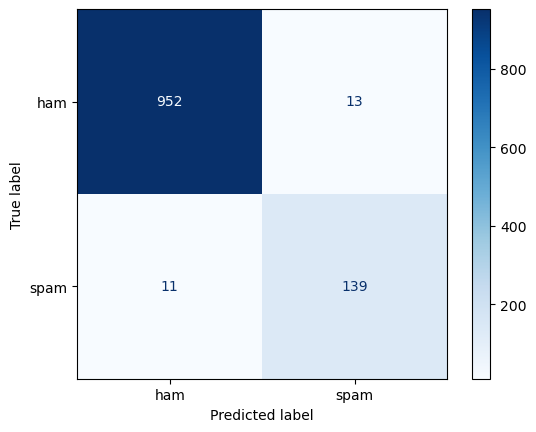

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['ham', 'spam'])
cm_display.plot(cmap='Blues')


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Initialize GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# Update the model with the best parameters
best_model = grid_search.best_estimator_


Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.9836176752153978


In [14]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [15]:
# Load the model from the file
loaded_model = joblib.load('spam_classifier_model.pkl')
loaded_vectorizer = joblib.load('vectorizer.pkl')

# Function to predict if a message is spam or ham using the loaded model
def predict_message_with_loaded_model(message):
    message = clean_text(message)
    message_features = loaded_vectorizer.transform([message])
    prediction = loaded_model.predict(message_features)
    return 'spam' if prediction[0] == 1 else 'ham'

# Test the function with a new message
print(predict_message_with_loaded_model("Congratulations! You've won a free ticket to the Bahamas!"))
print(predict_message_with_loaded_model("Hey, are we still on for lunch tomorrow?"))


spam
ham
